# Seer-py Example
This workbook runs through a brief example of how to use the seer-py library to interact directly with the seer database to view what data exists, download raw data, and upload new labels.

Firstly, we need to load in seer-py as well as data-handling tools numpy and pandas

In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
import seerpy
from seerpy.utils import plot_eeg

## Client
Now that we have the libraries loaded, we want to interact with the database. To do this, we need to create a client. The client handles the connection to the database as well as user crendentials. `createClient()` will prompt user for a username and password, and verify these credentials with the database.

In [3]:
client = seerpy.SeerConnect()

Login Successful


## Get list of available studies
First we want to get a list of the available studies. Depending on how many studies you have access to, this may take some time.

In [4]:
studies = client.get_studies()
# just print up to the first 5
for study in studies[:5]:
    print(study)

{'id': '00977f69-4595-4123-a6cf-7c48e1ed0fa3', 'name': '0 - short study for testing', 'patient': {'id': '5cf21d38-556a-4f86-a198-5cbb7d3415a8', 'user': {'fullName': 'Shannon Clarke'}}}
{'id': 'ba548c97-8b6f-4790-863b-6fc7d8e3f15b', 'name': '0 noeter copy', 'patient': None}
{'id': '348dc921-53e0-4d2c-83de-666af51684ea', 'name': '0 noether modified', 'patient': None}
{'id': 'f2b001fd-c7f0-46c0-a495-ad0965539b2a', 'name': '0 noether modified 2', 'patient': None}
{'id': '6097435b-f370-4e72-b5bc-ef74b63ec694', 'name': '0_eccles video sync patched - 181207', 'patient': None}


## Metadata
Next, we want to see all the data that is available for a study. This is handled by `get_all_study_metadata_dataframe_by_ids` or `get_all_study_metadata_dataframe_by_names` which will query the database to see everything that is available for a list of study ids or names, and return a list of pandas DataFrames. These dataframes will then be used to download data. In our case we will just get the data for a single study. Please modify the code in the next cell to get the data for a study or studies which are available to you - you can use one or more of the studies returned in the previous step.

Note: you can pass either a single id or name or a list of them to the metadata methods. Passing nothing will return data for all of the studies available to you. Depending on how many studies are available to you, this may take a long time and could possibly even time out.

In [5]:
study_metadata = client.get_all_study_metadata_dataframe_by_names('0 - short study for testing')
study_metadata.head(5)

,id,name,patient.id,patient.user.fullName,channelGroups.chunkPeriod,channelGroups.compression,channelGroups.exponent,channelGroups.id,channelGroups.name,channelGroups.recordLength,...,channelGroups.signalMax,channelGroups.signalMin,channelGroups.units,segments.duration,segments.id,segments.startTime,channels.channelType.category,channels.channelType.name,channels.id,channels.name
0,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-3,f798eae6-713a-49e5-b515-3c2b98feb4ef,ECG,1,...,5,-5,V,1200000,ff5ecb8d-1946-412f-af66-8ecb425ff9c2,1530561995000,ecg,ECG,cf55ef28-1a4f-4764-bf10-f0ebe0cf2c7e,ECG
1,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-3,f798eae6-713a-49e5-b515-3c2b98feb4ef,ECG,1,...,5,-5,V,1200000,ff5ecb8d-1946-412f-af66-8ecb425ff9c2,1530561995000,ecg,ECG,c0c6ea88-5f5c-4ed3-9eb7-3a569dfb9356,ECG2
2,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-3,f798eae6-713a-49e5-b515-3c2b98feb4ef,ECG,1,...,5,-5,V,1200000,7fb9a75b-98ba-4d0e-bbbb-fab07640c5b2,1530563195000,ecg,ECG,cf55ef28-1a4f-4764-bf10-f0ebe0cf2c7e,ECG
3,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-3,f798eae6-713a-49e5-b515-3c2b98feb4ef,ECG,1,...,5,-5,V,1200000,7fb9a75b-98ba-4d0e-bbbb-fab07640c5b2,1530563195000,ecg,ECG,c0c6ea88-5f5c-4ed3-9eb7-3a569dfb9356,ECG2
4,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-6,e62cbc89-fd05-4939-bc67-e0c29baea7bf,EEG,1,...,1000,-1000,V,1200000,abdd50f2-4664-4903-a73f-7c73ba16fbb5,1530561995000,eeg,Fz,a5ea6347-04a1-4591-8911-3c8a7ff4c926,Fz


###  
After you have meta data, you can filter down to a specific study, patient, data type, etc. In this example, we want eeg data from the study we queried above, and we can use pandas filtering methods to reduce `study_metadata` down to the rows of interest

In [6]:
eeg_metadata = study_metadata[study_metadata['channelGroups.name'].str.contains('EEG')]
eeg_metadata.head(5)

,id,name,patient.id,patient.user.fullName,channelGroups.chunkPeriod,channelGroups.compression,channelGroups.exponent,channelGroups.id,channelGroups.name,channelGroups.recordLength,...,channelGroups.signalMax,channelGroups.signalMin,channelGroups.units,segments.duration,segments.id,segments.startTime,channels.channelType.category,channels.channelType.name,channels.id,channels.name
4,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-6,e62cbc89-fd05-4939-bc67-e0c29baea7bf,EEG,1,...,1000,-1000,V,1200000,abdd50f2-4664-4903-a73f-7c73ba16fbb5,1530561995000,eeg,Fz,a5ea6347-04a1-4591-8911-3c8a7ff4c926,Fz
5,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-6,e62cbc89-fd05-4939-bc67-e0c29baea7bf,EEG,1,...,1000,-1000,V,1200000,abdd50f2-4664-4903-a73f-7c73ba16fbb5,1530561995000,eeg,C4,33fe85ab-c27a-4ae2-95fa-78e36216d1fe,C4
6,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-6,e62cbc89-fd05-4939-bc67-e0c29baea7bf,EEG,1,...,1000,-1000,V,1200000,abdd50f2-4664-4903-a73f-7c73ba16fbb5,1530561995000,eeg,Pz,0fcd76c8-7b6b-4f3d-a540-0ad0b036480f,Pz
7,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-6,e62cbc89-fd05-4939-bc67-e0c29baea7bf,EEG,1,...,1000,-1000,V,1200000,abdd50f2-4664-4903-a73f-7c73ba16fbb5,1530561995000,eeg,C3,e94adb3b-62b5-41a0-a844-c76bd6ec3443,C3
8,00977f69-4595-4123-a6cf-7c48e1ed0fa3,0 - short study for testing,5cf21d38-556a-4f86-a198-5cbb7d3415a8,Shannon Clarke,10,gzip,-6,e62cbc89-fd05-4939-bc67-e0c29baea7bf,EEG,1,...,1000,-1000,V,1200000,abdd50f2-4664-4903-a73f-7c73ba16fbb5,1530561995000,eeg,F3,0cbdf8a7-c077-4695-9651-91c5eba69012,F3


###  
`get_channel_data` takes a pandas dataframe (as given by `get_all_study_meta_data_dataframe_by_names`) and downloads raw data, returning another dataframe with raw data, a timestamp, and study metadata, such as id, channelGroup, and segment.

In [7]:
data = client.get_channel_data(eeg_metadata)
data.head()

,time,id,channelGroups.id,segments.id,Fz,C4,Pz,C3,F3,F4,...,T3,Fp1,Fp2,O2,O1,F7,F8,T6,T5,Cz
0,1.530562e+12,00977f69-4595-4123-a6cf-7c48e1ed0fa3,e62cbc89-fd05-4939-bc67-e0c29baea7bf,abdd50f2-4664-4903-a73f-7c73ba16fbb5,-0.000049,0.000018,-0.000057,-0.000014,-0.000022,-0.000082,...,-0.000038,-0.000063,-0.000053,0.000007,-0.000013,-0.000152,-0.000176,0.000031,-0.000032,-0.000027
1,1.530562e+12,00977f69-4595-4123-a6cf-7c48e1ed0fa3,e62cbc89-fd05-4939-bc67-e0c29baea7bf,abdd50f2-4664-4903-a73f-7c73ba16fbb5,-0.000038,0.000025,-0.000053,-0.000031,-0.000011,-0.000070,...,-0.000100,-0.000046,-0.000030,0.000005,-0.000023,-0.000076,-0.000041,0.000014,-0.000019,-0.000022
2,1.530562e+12,00977f69-4595-4123-a6cf-7c48e1ed0fa3,e62cbc89-fd05-4939-bc67-e0c29baea7bf,abdd50f2-4664-4903-a73f-7c73ba16fbb5,-0.000034,0.000025,-0.000053,-0.000023,-0.000013,-0.000060,...,-0.000013,-0.000021,-0.000037,0.000005,-0.000023,-0.000093,-0.000046,0.000024,-0.000019,-0.000020
3,1.530562e+12,00977f69-4595-4123-a6cf-7c48e1ed0fa3,e62cbc89-fd05-4939-bc67-e0c29baea7bf,abdd50f2-4664-4903-a73f-7c73ba16fbb5,-0.000029,0.000034,-0.000050,-0.000030,-0.000007,-0.000051,...,-0.000089,-0.000016,-0.000034,0.000019,-0.000003,-0.000091,-0.000013,0.000019,-0.000011,-0.000018
4,1.530562e+12,00977f69-4595-4123-a6cf-7c48e1ed0fa3,e62cbc89-fd05-4939-bc67-e0c29baea7bf,abdd50f2-4664-4903-a73f-7c73ba16fbb5,-0.000043,0.000022,-0.000065,-0.000001,-0.000007,-0.000056,...,-0.000033,-0.000044,-0.000049,0.000016,-0.000020,-0.000013,0.000011,0.000030,-0.000025,-0.000036


####  
To see what we are actually looking at, lets make a plot. `plot_eeg` is a simple function to plot either a pandas dataframe or numpy array.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

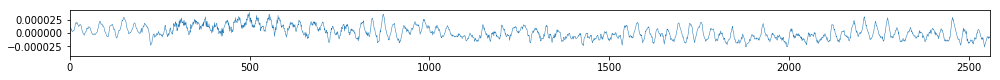

In [8]:
start = 30000
end = start + 2560
plot_data = data.iloc[start:end, 7]
plot_data = plot_data - plot_data.median()
plot_eeg(x=plot_data)

####  
Now we want to create a new label group, and if it exists, we will delete and re-create it.
`del_label_group` will delete a label group given a label_group_id
`add_label_group` will create a new labelGroup given study_id, label_group_name, label_group_description and optional label_ype_id

In [9]:
study_id = study_metadata['id'].iloc[0]
label_groups = client.get_label_groups_for_studies_dataframe(study_id)

label_group_name = 'testname1'
existing_label_groups = label_groups[label_groups['labelGroup.name'] == label_group_name]
if not existing_label_groups.empty:
    existing_label_group_id = existing_label_groups['labelGroup.id'].iloc[0]
    client.del_label_group(existing_label_group_id)

label_group_description = 'testDescription'
label_group_id = client.add_label_group(study_id, label_group_name, label_group_description)
label_group_id

'73183a42-bad6-4238-89d5-3fac00349916'

Now we're ready to create our new label. In this example, we will highlight any areas where the amplitide is above 90% over a one second window. This could be used to highlight areas of extreme amplitude, which are potentially artifacts in the recording.

In [10]:
# get the rolling average of the 8th column
data_new = data.iloc[:,7].rolling(64).mean()

# create a mask of the data which is > the 90th percentile
alarm_label = data_new > data_new.quantile(0.9)

# create masks of the starts and ends of the high amplitude data
alarm_label_on = (alarm_label != alarm_label.shift(1)) & alarm_label
alarm_label_off = (alarm_label != alarm_label.shift(1)) & (alarm_label == False)

# first value of shift is NaN, so first elements will always be different.
alarm_label_off.iloc[0] = False

# check for the situation where the data is still on at the end
length_diff = len(alarm_label_on.index) - len(alarm_label_off.index)
if length_diff == 1:
    # assume the label is still on at the end, so turn it off
    alarm_label_off.iloc[-1] = True
elif length_diff > 1:
    print('Error: label on and off masks are different lengths:', len(alarm_label_on.index),
          'vs', len(alarm_label_off.index))
    raise

alarm_label_on.head()

0    False
1    False
2    False
3    False
4    False
Name: C3, dtype: bool

Now we can upload the labels to the Seer database with `add_labels`, which takes a list of dicts which describe the labels or, as we supply, a pandas DataFrame.

In [11]:
# create the data required to create the labels
label_on_times = data[alarm_label_on]['time'].reset_index(drop=True).rename('startTime')
label_off_times = data[alarm_label_off]['time'].reset_index(drop=True)
label_durations = (label_off_times - label_on_times).rename('duration')
labels = pd.concat([label_on_times, label_durations], axis=1)

labels['note'] = 'amplitude > 90%'

# get the correct timezone for the time of the study.
# this assumes that the study uses Melbourne time.
import datetime, pytz
study_start = datetime.datetime.fromtimestamp(data['time'].iloc[0]/1000.0)
labels['timezone'] = int(int(pytz.timezone('Australia/Melbourne').localize(study_start).strftime('%z'))/100)

response = client.add_labels(label_group_id, labels)
response

{'addLabelsToLabelGroup': [{'id': '5dcb222e-ef63-4f9d-a698-b117ce3466c5'},
  {'id': '5403c4df-4f57-4904-93d9-525aa16ac51a'},
  {'id': '2a09fc4d-d3e0-47f1-aae1-fd869e3635ac'},
  {'id': 'bda00d36-8906-455a-9859-c4dfb9ebf30e'},
  {'id': '42e45ba7-b93e-4f31-ad5c-3d4b746d5311'},
  {'id': 'e75daba4-9112-4523-b69b-478c85b9815a'},
  {'id': '90b2843f-2d39-40f1-8083-ca8ef49f6656'},
  {'id': 'c479f59e-306d-4156-b550-b2ff5e5ef909'},
  {'id': 'bf6b070f-e1bb-4d22-8063-010664fd767d'},
  {'id': 'a0e54e2d-9f3b-454a-8580-dd8a4cb327be'},
  {'id': '0568f30c-bc4d-4714-9692-35e992b362d8'},
  {'id': '3a03b55f-adda-40cf-9a06-585855ee8a45'},
  {'id': '16a5232e-a581-412f-b25f-e76c637e3fa9'},
  {'id': '201006b2-2034-4f1d-b84d-f06da0793b26'},
  {'id': '3752d10e-4772-4130-9520-c10fef5e85ae'},
  {'id': 'ff5e16d9-4ea9-4b1c-9a71-d441e02794bf'},
  {'id': 'ad02cb02-246a-48fa-bf0b-93b17fa14212'},
  {'id': '1eb8c08e-03b7-48a6-9e6f-60eb376846df'},
  {'id': '9bf6529d-061d-458c-b349-935c13c34daa'},
  {'id': '8e7deb04-fba3-4

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

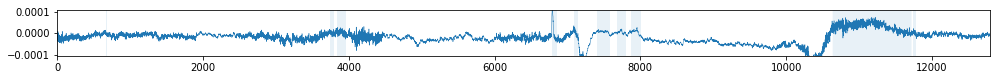

In [13]:
start = 0
end = 12800
plot_eeg(x=data.iloc[start:end, 7], y=alarm_label[start:end])

## Getting more Information

If you're not sure how something works, try the function name, followed by '?' (e.g. seer.addLabel?), or help(function_name)

In [14]:
help(client.add_labels)

Help on method add_labels in module seerpy.seerpy:

add_labels(group_id, labels) method of seerpy.seerpy.SeerConnect instance
    Add labels to label group
    
    Parameters
    ----------
    group_id : string
            Seer label group ID
    
    labels: list of:
            note: string
                    label note
            startTime : float
                    label start time in epoch time
            duration : float
                    duration of event in milliseconds
            timezone : float
                    local UTC timezone (eg. Melbourne = 11.0)
            tagIds: [String!]
                    list of tag ids
            confidence: float
                    Confidence given to label between 0 and 1
    
    Returns
    -------
    None
    
    Notes
    -----

